<a id="title"></a>
<a id="toc"></a>
![title](source/header2.png)

<div  style="margin-top: 9px; background-color: #efefef; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
    <center>
        <h2>Table of Contents</h2>
    </center>

   
<ol>
    <li><a href="#01" style="color: #37509b;">Initialization</a></li>
    <li><a href="#02" style="color: #37509b;">Dataset: Cleaning and Exploration</a></li>
    <li><a href="#03" style="color: #37509b;">Modelling</a></li>
    <li><a href="#04" style="color: #37509b;">Quarta Seção</a></li>
    <li><a href="#05" style="color: #37509b;">Quinta Seção </a></li>

</ol>


</div>

<a id="01" style="
  background-color: #37509b;
  border: none;
  color: white;
  padding: 2px 10px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 10px;" href="#toc">TOC ↻</a>
  
  
<div  style="margin-top: 9px; background-color: #efefef; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
        <center>
            <h1>1. Initialization</h1>
        </center>

   
   
<ol type="i">
<!--     <li><a href="#0101" style="color: #37509b;">Inicialização</a></li>
    <li><a href="#0102" style="color: #37509b;">Pacotes</a></li>
    <li><a href="#0103" style="color: #37509b;">Funcoes</a></li>
    <li><a href="#0104" style="color: #37509b;">Dados de Indicadores Sociais</a></li>
    <li><a href="#0105" style="color: #37509b;">Dados de COVID-19</a></li>
 -->
</ol>



</div>

<a id="0101"></a>
<h2>1.1 Description <a href="#01"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

Dataset available in:

  <a href="https://www.kaggle.com/c/titanic/" target="_blank">https://www.kaggle.com/c/titanic/</a>
  

### Features

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

<a id="0102"></a>
<h2>1.2 Packages <a href="#01"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time,sleep


import nltk
from nltk import tokenize
from string import punctuation
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from unidecode import unidecode

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate,KFold,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import randint
from numpy.random import uniform

<a id="0103"></a>
<h2>1.3 Settings <a href="#01"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

In [2]:
# pandas options
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

# seaborn options
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

SEED = 42

<a id="0104"></a>
<h2>1.4 Useful Functions <a href="#01"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

In [3]:
def treat_words(df,
      col,
      language='english',
      inplace=False,
      tokenizer = tokenize.WordPunctTokenizer(),
      decode = True,
      stemmer = None,
      lower = True,
      remove_words = [],

    ):
    """
    Description:
    ----------------
        Receives a dataframe and the column name. Eliminates
        stopwords for each row of that column and apply stemmer.
        After that, it regroups and returns a list.
        
        tokenizer = tokenize.WordPunctTokenizer()
                    tokenize.WhitespaceTokenizer()
                    
        stemmer =    PorterStemmer()
                     SnowballStemmer()
                     LancasterStemmer()
                     nltk.RSLPStemmer() # in portuguese
    """
    
    
    pnct = [string for string in punctuation] # from string import punctuation 
    wrds = nltk.corpus.stopwords.words(language)
    unwanted_words = pnct + wrds + remove_words

    processed_text = list()

    for element in tqdm(df[col]):

        # starts a new list
        new_text = list()

        # starts a list with the words of the non precessed text
        text_old = tokenizer.tokenize(element)

        # check each word
        for wrd in text_old:

            # if the word are not in the unwanted words list
            # add to the new list
            if wrd.lower() not in unwanted_words:
                
                new_wrd = wrd
                
                if decode: new_wrd = unidecode(new_wrd)
                if stemmer: new_wrd = stemmer.stem(new_wrd)
                if lower: new_wrd = new_wrd.lower()
                    
                if new_wrd not in remove_words:
                    new_text.append(new_wrd)

        processed_text.append(' '.join(new_text))

    if inplace:
        df[col] = processed_text
    else:
        return processed_text


In [4]:
def list_words_of_class(df,
                          col,
                          language='english',
                          inplace=False,
                          tokenizer = tokenize.WordPunctTokenizer(),
                          decode = True,
                          stemmer = None,
                          lower = True,
                          remove_words = []
                         ):
    """
    Description:
    ----------------
    
        Receives a dataframe and the column name. Eliminates
        stopwords for each row of that column, apply stemmer
        and returns a list of all the words.
    
    """
    
    lista = treat_words(
        df,col = col,language = language,
        tokenizer=tokenizer,decode=decode,
        stemmer=stemmer,lower=lower,
        remove_words = remove_words
        )
    
    words_list = []
    for string in lista:
        words_list += tokenizer.tokenize(string)
        
        
    return words_list

In [5]:
def get_frequency(df,
                  col,
                  language='english',
                  inplace=False,
                  tokenizer = tokenize.WordPunctTokenizer(),
                  decode = True,
                  stemmer = None,
                  lower = True,
                  remove_words = []
                 ):
    
    list_of_words = list_words_of_class(
              df,
              col = col,
              decode = decode,
              stemmer = stemmer,
              lower = lower,
              remove_words = remove_words
      )
    
    freq = nltk.FreqDist(list_of_words)
    
    df_freq = pd.DataFrame({
        'word': list(freq.keys()),
        'frequency': list(freq.values())
    }).sort_values(by='frequency',ascending=False)

    n_words = df_freq['frequency'].sum()

    df_freq['prop'] = 100*df_freq['frequency']/n_words

    return df_freq

In [6]:
def common_best_words(df,col,n_common = 10,tol_frac = 0.8,n_jobs = 1):
    list_to_remove = []

    for i in range(0,n_jobs):
        print('[info] Most common words in not survived')
        sleep(0.5)
        df_dead = get_frequency(
                  df.query('Survived == 0'),
                  col = col,
                  decode = False,
                  stemmer = False,
                  lower = False,
                  remove_words = list_to_remove )

        print('[info] Most common words in survived')
        sleep(0.5)
        df_surv = get_frequency(
                  df.query('Survived == 1'),
                  col = col,
                  decode = False,
                  stemmer = False,
                  lower = False,
                  remove_words = list_to_remove )


        words_dead = df_dead.nlargest(n_common, 'frequency')

        list_dead = list(words_dead['word'].values)

        words_surv = df_surv.nlargest(n_common, 'frequency')

        list_surv = list(words_surv['word'].values)

        for word in list(set(list_dead).intersection(list_surv)):
            prop_dead = words_dead[words_dead['word'] == word]['prop'].values[0]
            prop_surv = words_surv[words_surv['word'] == word]['prop'].values[0]
            ratio = min([prop_dead,prop_surv])/max([prop_dead,prop_surv])

            if ratio > tol_frac:
                list_to_remove.append(word)
        
        return list_to_remove

In [7]:
def just_keep_the_words(df,
      col,
      keep_words = [],
      tokenizer = tokenize.WordPunctTokenizer()
    ):
    """
    Description:
    ----------------
        Removes all words that is not in `keep_words`
    """
    
    processed_text = list()

    # para cada avaliação
    for element in tqdm(df[col]):

        # starts a new list
        new_text = list()

        # starts a list with the words of the non precessed text
        text_old = tokenizer.tokenize(element)

        for wrd in text_old:

            if wrd in keep_words: new_text.append(wrd)

        processed_text.append(' '.join(new_text))

    return processed_text


In [8]:
class Classifier:
    '''
    Description
    -----------------
    
    Class to approach classification algorithm
    
    
    Example
    -----------------
        classifier = Classifier(
                 algorithm = ChooseTheAlgorith,
                 hyperparameters_range = {
                    'hyperparameter_1': [1,2,3],
                    'hyperparameter_2': [4,5,6],
                    'hyperparameter_3': [7,8,9]
                 }
             )

        # Looking for best model
        classifier.grid_search_fit(X,y,n_splits=10)
        #dt.grid_search_results.head(3)

        # Prediction Form 1
        par = classifier.best_model_params
        dt.fit(X_trn,y_trn,params = par)
        y_pred = classifier.predict(X_tst)
        print(accuracy_score(y_tst, y_pred))

        # Prediction Form 2
        classifier.fit(X_trn,y_trn,params = 'best_model')
        y_pred = classifier.predict(X_tst)
        print(accuracy_score(y_tst, y_pred))

        # Prediction Form 3
        classifier.fit(X_trn,y_trn,min_samples_split = 5,max_depth=4)
        y_pred = classifier.predict(X_tst)
        print(accuracy_score(y_tst, y_pred))
    '''
    def __init__(self,algorithm, hyperparameters_range={},random_state=42):
        
        self.algorithm = algorithm
        self.hyperparameters_range = hyperparameters_range
        self.random_state = random_state
        self.grid_search_cv = None
        self.grid_search_results = None
        self.hyperparameters = self.__get_hyperparameters()
        self.best_model = None
        self.best_model_params = None
        self.fitted_model = None
        
    def grid_search_fit(self,X,y,verbose=0,n_splits=10,shuffle=True,scoring='accuracy'):
        
        self.grid_search_cv = GridSearchCV(
            self.algorithm(),
            self.hyperparameters_range,
            cv = KFold(n_splits = n_splits, shuffle=shuffle, random_state=self.random_state),
            scoring=scoring,
            verbose=verbose
        )
        
        self.grid_search_cv.fit(X, y)
        
        col = list(map(lambda par: 'param_'+str(par),self.hyperparameters))+[
                'mean_fit_time',
                'mean_test_score',
                'std_test_score',
                'params'
              ]
        
        results = pd.DataFrame(self.grid_search_cv.cv_results_)
        
        self.grid_search_results = results[col].sort_values(
                    ['mean_test_score','mean_fit_time'],
                    ascending=[False,True]
                ).reset_index(drop=True)
        
        self.best_model = self.grid_search_cv.best_estimator_
        
        self.best_model_params = self.best_model.get_params()
    
    def best_model_cv_score(self,X,y,parameter='test_score',verbose=0,n_splits=10,shuffle=True,scoring='accuracy'):
        if self.best_model != None:
            cv_results = cross_validate(
                self.best_model,
                X = X,
                y = y,
                cv=KFold(n_splits = 10,shuffle=True,random_state=self.random_state)
            )
            return {
                parameter+'_mean': cv_results[parameter].mean(),
                parameter+'_std': cv_results[parameter].std()
            }
        
    def fit(self,X,y,params=None,**kwargs):
        model = None
        if len(kwargs) == 0 and params == 'best_model' and self.best_model != None:
            model = self.best_model
            
        elif type(params) == dict and len(params) > 0:
            model = self.algorithm(**params)
            
        elif len(kwargs) >= 0 and params==None:
            model = self.algorithm(**kwargs)
            
        else:
            print('[Error]')
            
        if model != None:
            model.fit(X,y)
            
        self.fitted_model = model
            
    def predict(self,X):
        if self.fitted_model != None:
            return self.fitted_model.predict(X)
        else:
            print('[Error]')
            return np.array([])
            
    def predict_score(self,X_tst,y_tst,score=accuracy_score):
        if self.fitted_model != None:
            y_pred = self.predict(X_tst)
            return score(y_tst, y_pred)
        else:
            print('[Error]')
            return np.array([])
        
    def hyperparameter_info(self,hyperpar):
        str_ = 'param_'+hyperpar
        return self.grid_search_results[
                [str_,'mean_fit_time','mean_test_score']
            ].groupby(str_).agg(['mean','std'])
        
    def __get_hyperparameters(self):
        return [hp for hp in self.hyperparameters_range]

In [9]:
def cont_class_limits(lis_df,n_class):
    ampl = lis_df.quantile(1.0)-lis_df.quantile(0.0)
    ampl_class = ampl/n_class 
    limits = [[i*ampl_class,(i+1)*ampl_class] for i in range(n_class)]
    return limits

def cont_classification(lis_df,limits):
    list_res = []
    n_class = len(limits)
    for elem in lis_df:
        for ind in range(n_class-1):
            if elem >= limits[ind][0] and elem < limits[ind][1]:
                list_res.append(ind+1)
            
        if elem >= limits[-1][0]: list_res.append(n_class)
            
    return list_res


<a id="02" style="
  background-color: #37509b;
  border: none;
  color: white;
  padding: 2px 10px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 10px;" href="#toc">TOC ↻</a>
  
  
<div  style="margin-top: 9px; background-color: #efefef; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
        <center>
            <h1>2. Dataset: Cleaning and Exploration</h1>
        </center>

   
   
<ol type="i">
<!--     <li><a href="#0101" style="color: #37509b;">Inicialização</a></li>
    <li><a href="#0102" style="color: #37509b;">Pacotes</a></li>
    <li><a href="#0103" style="color: #37509b;">Funcoes</a></li>
    <li><a href="#0104" style="color: #37509b;">Dados de Indicadores Sociais</a></li>
    <li><a href="#0105" style="color: #37509b;">Dados de COVID-19</a></li>
 -->
</ol>



</div>

<a id="0101"></a>
<h2>2.1 Import Dataset <a href="#02"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

In [10]:
df_trn = pd.read_csv('data/train.csv')
df_tst = pd.read_csv('data/test.csv')

df = pd.concat([df_trn,df_tst])

df_trn = df_trn.drop(columns=['PassengerId'])
df_tst = df_tst.drop(columns=['PassengerId'])

In [11]:
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


## Pclass

Investigating if the class is related to the probability of survival

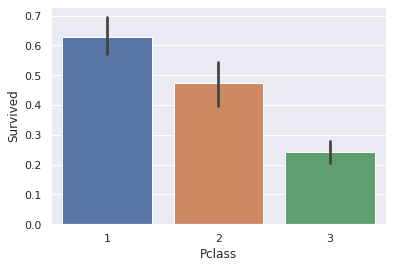

In [12]:
sns.barplot(x='Pclass', y="Survived", data=df_trn)

## Name

In [13]:
treat_words(df_trn,col = 'Name',inplace=True)
treat_words(df_tst,col = 'Name',inplace=True)

100%|██████████| 418/418 [00:00<00:00, 26352.70it/s]


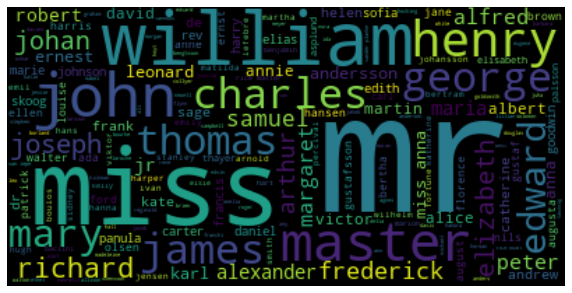

In [14]:
%matplotlib inline

from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join(list(df_trn['Name']))

word_cloud = WordCloud().generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
common_best_words(df_trn,col='Name',n_common = 10,tol_frac = 0.5,n_jobs = 1)

[info] Most common words in not survived


100%|██████████| 549/549 [00:00<00:00, 30744.94it/s]


[info] Most common words in survived


100%|██████████| 342/342 [00:00<00:00, 9404.70it/s]


['william', 'master']

We can see that Master and William are words with equivalent proportion between both survived and not survived cases. So, they are not good descriptive words

In [16]:
df_comm = get_frequency(df_trn,col = 'Name',remove_words=['("','")','master', 'william']).reset_index(drop=True)
surv_prob = [ df_trn['Survived'][df_trn['Name'].str.contains(row['word'])].mean() for index, row in df_comm.iterrows()]
df_comm['survival_prob (%)'] = 100*np.array(surv_prob)
print('Survival Frequency related to words in Name')
df_comm.head(10)

100%|██████████| 891/891 [00:00<00:00, 51739.95it/s]


Survival Frequency related to words in Name


,word,frequency,prop,survival_prob (%)
0,mr,521,14.83,28.44
1,miss,182,5.18,69.78
2,mrs,129,3.67,79.07
3,john,44,1.25,26.92
4,henry,35,1.00,29.41
5,george,24,0.68,33.33
6,charles,24,0.68,29.17
7,james,24,0.68,25.00
8,thomas,22,0.63,36.36
9,mary,20,0.57,75.00


In [17]:
df_comm_surv = get_frequency(df_trn[df_trn['Survived']==1],col = 'Name',remove_words=['("','")']).reset_index(drop=True)
sleep(0.5)
print('Most frequent words within those who survived')
df_comm_surv.head(10)

100%|██████████| 342/342 [00:00<00:00, 45135.52it/s]


Most frequent words within those who survived


,word,frequency,prop
0,miss,127,8.32
1,mrs,102,6.68
2,mr,84,5.50
3,william,23,1.51
4,master,23,1.51
5,mary,15,0.98
6,elizabeth,13,0.85
7,anna,12,0.79
8,john,11,0.72
9,henry,10,0.65


In [18]:
df_comm_dead = get_frequency(df_trn[df_trn['Survived']==0],col = 'Name',remove_words=['("','")']).reset_index(drop=True)
sleep(0.5)
print("Most frequent words within those that did not survive")
df_comm_dead.head(10)

100%|██████████| 549/549 [00:00<00:00, 26292.82it/s]


Most frequent words within those that did not survive


,word,frequency,prop
0,mr,437,20.92
1,miss,55,2.63
2,william,41,1.96
3,john,33,1.58
4,mrs,27,1.29
5,henry,25,1.20
6,james,18,0.86
7,charles,17,0.81
8,master,17,0.81
9,george,16,0.77


### Feature Engineering

In [19]:
min_occurrences = 2
df_comm = get_frequency(df,col = 'Name',
                        remove_words=['("','")','john','henry', 'william','h','j','jr']
                       ).reset_index(drop=True)
words_to_keep = list(df_comm[df_comm['frequency'] > min_occurrences]['word'])

df_trn['Name'] = just_keep_the_words(df_trn,
                    col = 'Name',
                    keep_words = words_to_keep 
                   )

df_tst['Name'] = just_keep_the_words(df_tst,
                    col = 'Name',
                    keep_words = words_to_keep 
                   )

100%|██████████| 418/418 [00:00<00:00, 36932.42it/s]


In [20]:
vectorize = CountVectorizer(lowercase=True,max_features = 4)
vectorize.fit(df_trn['Name'])
bag_of_words = vectorize.transform(df_trn['Name'])

X = pd.DataFrame(vectorize.fit_transform(df_trn['Name']).toarray(),
             columns=list(map(lambda word: 'Name_'+word,vectorize.get_feature_names()))
            )
y = df_trn['Survived']

from sklearn.model_selection import train_test_split
X_trn,X_tst,y_trn,y_tst = train_test_split(
    X,
    y,
    test_size = 0.25,
    random_state=42
)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=100)
classifier.fit(X_trn,y_trn)
accuracy = classifier.score(X_tst,y_tst)
print('Accuracy = %.3f%%' % (100*accuracy))

Accuracy = 78.924%


In [21]:
df_trn = pd.concat([
            df_trn
            ,
            pd.DataFrame(vectorize.fit_transform(df_trn['Name']).toarray(),
                  columns=list(map(lambda word: 'Name_'+word,vectorize.get_feature_names()))
                )
        ],axis=1).drop(columns=['Name'])

df_tst = pd.concat([
            df_tst
            ,
            pd.DataFrame(vectorize.fit_transform(df_tst['Name']).toarray(),
                  columns=list(map(lambda word: 'Name_'+word,vectorize.get_feature_names()))
                )
        ],axis=1).drop(columns=['Name'])

## Sex

In [22]:
from sklearn.preprocessing import LabelEncoder
Sex_Encoder = LabelEncoder()

df_trn['Sex'] = Sex_Encoder.fit_transform(df_trn['Sex']).astype(int)
df_tst['Sex'] = Sex_Encoder.transform(df_tst['Sex']).astype(int)

## Age

In [23]:
mean_age = df['Age'][df['Age'].notna()].mean()
df_trn['Age'].fillna(mean_age,inplace=True)
df_tst['Age'].fillna(mean_age,inplace=True)
age_limits = cont_class_limits(df['Age'],3)
df_trn['Age'] = cont_classification(df_trn['Age'],age_limits)
df_tst['Age'] = cont_classification(df_tst['Age'],age_limits)

## Family Size

In [24]:
# df_trn['FamilySize'] = df_trn['SibSp'] + df_trn['Parch'] + 1
# df_tst['FamilySize'] = df_tst['SibSp'] + df_tst['Parch'] + 1

# df_trn = df_trn.drop(columns = ['SibSp','Parch'])
# df_tst = df_tst.drop(columns = ['SibSp','Parch'])

## Cabin Feature

There is very little data about the cabin

In [25]:
# df_trn['Cabin'] = df_trn['Cabin'].fillna('N000')

# df_cab = df_trn[df_trn['Cabin'].notna()]

# df_cab = pd.concat(
#     [
#         df_cab,
#         df_cab['Cabin'].str.extract(
#             '([A-Za-z]+)(\d+\.?\d*)([A-Za-z]*)', 
#             expand = True).drop(columns=[2]).rename(
#             columns={0: 'Cabin_Class', 1: 'Cabin_Number'}
#         )
#     ], axis=1)

# df_trn = df_cab.drop(columns=['Cabin','Cabin_Number'])
# df_trn = pd.concat([
#             df_trn.drop(columns=['Cabin_Class']),
#             pd.get_dummies(df_trn['Cabin_Class'],prefix='Cabin').drop(columns=['Cabin_N'])
# #             pd.get_dummies(df_trn['Cabin_Class'],prefix='Cabin')
#         ],axis=1)


# df_tst['Cabin'] = df_tst['Cabin'].fillna('N000')

# df_cab = df_tst[df_tst['Cabin'].notna()]

# df_cab = pd.concat(
#     [
#         df_cab,
#         df_cab['Cabin'].str.extract(
#             '([A-Za-z]+)(\d+\.?\d*)([A-Za-z]*)', 
#             expand = True).drop(columns=[2]).rename(
#             columns={0: 'Cabin_Class', 1: 'Cabin_Number'}
#         )
#     ], axis=1)

# df_tst = df_cab.drop(columns=['Cabin','Cabin_Number'])
# df_tst = pd.concat([
#             df_tst.drop(columns=['Cabin_Class']),
#             pd.get_dummies(df_tst['Cabin_Class'],prefix='Cabin').drop(columns=['Cabin_N'])
# #             pd.get_dummies(df_tst['Cabin_Class'],prefix='Cabin')
#         ],axis=1)

## Ticket

In [26]:
df_trn = df_trn.drop(columns=['Ticket'])
df_tst = df_tst.drop(columns=['Ticket'])

## Fare

In [27]:
mean_fare = df['Fare'][df['Fare'].notna()].mean()
df_trn['Fare'].fillna(mean_fare,inplace=True)
df_tst['Fare'].fillna(mean_fare,inplace=True)

fare_limits = cont_class_limits(df['Fare'],3)
df_trn['Fare'] = cont_classification(df_trn['Fare'],fare_limits)
df_tst['Fare'] = cont_classification(df_tst['Fare'],fare_limits)

## Embarked

In [28]:
most_frequent_emb = df['Embarked'].value_counts()[:1].index.tolist()[0]
df_trn['Embarked'] = df_trn['Embarked'].fillna(most_frequent_emb)
df_tst['Embarked'] = df_tst['Embarked'].fillna(most_frequent_emb)

In [29]:
df_trn = pd.concat([
            df_trn.drop(columns=['Embarked']),
            pd.get_dummies(df_trn['Embarked'],prefix='Emb').drop(columns=['Emb_C'])
#             pd.get_dummies(df_trn['Embarked'],prefix='Emb')
        ],axis=1)


df_tst = pd.concat([
            df_tst.drop(columns=['Embarked']),
            pd.get_dummies(df_tst['Embarked'],prefix='Emb').drop(columns=['Emb_C'])
#             pd.get_dummies(df_tst['Embarked'],prefix='Emb')
        ],axis=1)

<a id="03" style="
  background-color: #37509b;
  border: none;
  color: white;
  padding: 2px 10px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 10px;" href="#toc">TOC ↻</a>
  
  
<div  style="margin-top: 9px; background-color: #efefef; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
        <center>
            <h1>3. Modelling</h1>
        </center>

   
   
<ol type="i">
<!--     <li><a href="#0101" style="color: #37509b;">Inicialização</a></li>
    <li><a href="#0102" style="color: #37509b;">Pacotes</a></li>
    <li><a href="#0103" style="color: #37509b;">Funcoes</a></li>
    <li><a href="#0104" style="color: #37509b;">Dados de Indicadores Sociais</a></li>
    <li><a href="#0105" style="color: #37509b;">Dados de COVID-19</a></li>
 -->
</ol>



</div>

### Classification Approach

In [30]:
Model_Scores = {}

In [31]:
Model_Scores = {}

def print_model_scores():
    return pd.DataFrame([[
        model,
        Model_Scores[model]['test_accuracy_score'],
        Model_Scores[model]['cv_score_mean'],
        Model_Scores[model]['cv_score_std']
    ] for model in Model_Scores.keys()],
        columns=['model','test_accuracy_score','cv_score','cv_score_std']
    ).sort_values(by='cv_score',ascending=False)


def OptimizeClassification(X,y,
    model,
    hyperparametric_space,
    cv = KFold(n_splits = 10, shuffle=True,random_state=SEED),
    model_description = 'classifier',
    n_iter = 20,
    test_size = 0.25
):
    
    X_trn,X_tst,y_trn,y_tst = train_test_split(
        X,
        y,
        test_size = test_size,
        random_state=SEED
    )
    
    start = time()

    # Searching the best setting
    print('[info] Searching for the best hyperparameter')
    search_cv = RandomizedSearchCV(
                        model,
                        hyperparametric_space,
                        n_iter = n_iter,
                        cv = cv,
                        random_state = SEED)

    search_cv.fit(X, y)
    results = pd.DataFrame(search_cv.cv_results_)

    print('[info] Search Timing: %.2f seconds'%(time() - start))

    # Evaluating Test Score For Best Estimator
    start = time()
    print('[info] Test Accuracy Score')
    gb = search_cv.best_estimator_
    gb.fit(X_trn, y_trn)
    y_pred = gb.predict(X_tst)

    # Evaluating K Folded Cross Validation
    print('[info] KFolded Cross Validation')
    cv_results = cross_validate(search_cv.best_estimator_,X,y,
                    cv = cv )

    print('[info] Cross Validation Timing: %.2f seconds'%(time() - start))
    
    Model_Scores[model_description] = {
        'test_accuracy_score':gb.score(X_tst,y_tst),
        'cv_score_mean':cv_results['test_score'].mean(),
        'cv_score_std':cv_results['test_score'].std(),
        'best_params':search_cv.best_estimator_.get_params()
    }
    
    pd.options.display.float_format = '{:,.5f}'.format

    print('\t\t test_accuracy_score: {:.3f}'.format(gb.score(X_tst,y_tst)))
    print('\t\t cv_score: {:.3f}±{:.3f}'.format(
        cv_results['test_score'].mean(),cv_results['test_score'].std()))


    params_list = ['mean_test_score']+list(map(lambda var: 'param_'+var,search_cv.best_params_.keys()))+['mean_fit_time']
    
    return results[params_list].sort_values(
        ['mean_test_score','mean_fit_time'],
        ascending=[False,True]
    )

## Scaling DataSet

In [32]:
scaler = StandardScaler()
# caler = Normalizer()
scaler.fit(df_trn.drop(columns=['Survived','Cabin']))
X = scaler.transform(df_trn.drop(columns=['Survived','Cabin']))
y = df_trn['Survived']

## Logistic Regression

In [33]:
results = OptimizeClassification(X,y,
        model = LogisticRegression(random_state=SEED),
        hyperparametric_space = {
            'solver' : ['newton-cg', 'lbfgs', 'liblinear'],# 
            'C' : uniform(0.075,0.125,200) #10**uniform(-2,2,200)
        },
        cv = KFold(n_splits = 50, shuffle=True,random_state=SEED),
        model_description = 'LogisticRegression',
        n_iter = 20
    )

results.head(5)

[info] Searching for the best hyperparameter
[info] Search Timing: 13.20 seconds
[info] Test Accuracy Score
[info] KFolded Cross Validation
[info] Cross Validation Timing: 0.15 seconds
		 test_accuracy_score: 0.798
		 cv_score: 0.831±0.096


,mean_test_score,param_solver,param_C,mean_fit_time
5,0.83078,liblinear,0.10740,0.00310
19,0.83078,liblinear,0.11050,0.00312
3,0.83078,liblinear,0.10894,0.00355
4,0.83078,lbfgs,0.09474,0.01197
12,0.83078,lbfgs,0.08227,0.01218


## Support Vector Classifier

In [34]:
results = OptimizeClassification(X,y,
         model = SVC(random_state=SEED),
         hyperparametric_space = {
                'kernel' : ['linear', 'poly','rbf','sigmoid'],
                'C' : 10**uniform(-1,1,200),
                'decision_function_shape' : ['ovo', 'ovr'],
                'degree' : [1,2,3,4]
            },
        cv = KFold(n_splits = 50, shuffle=True,random_state=SEED),
        model_description = 'SVC',
        n_iter = 20
    )

results.head(5)

[info] Searching for the best hyperparameter
[info] Search Timing: 22.96 seconds
[info] Test Accuracy Score
[info] KFolded Cross Validation
[info] Cross Validation Timing: 1.02 seconds
		 test_accuracy_score: 0.830
		 cv_score: 0.836±0.098


,mean_test_score,param_kernel,param_degree,param_decision_function_shape,param_C,mean_fit_time
6,0.83634,rbf,2,ovo,0.39870,0.01938
11,0.83529,rbf,3,ovo,1.17817,0.01750
8,0.83412,rbf,1,ovr,0.19427,0.01872
2,0.83190,rbf,3,ovo,0.15231,0.01905
17,0.82954,poly,2,ovr,1.35550,0.01473


## Decision Tree Classifier

In [35]:
results = OptimizeClassification(X,y,
         model = DecisionTreeClassifier(),
         hyperparametric_space = {
            'min_samples_split': randint(10,30),
            'max_depth': randint(10,30),
            'min_samples_leaf': randint(1,10)
         },
        cv = KFold(n_splits = 50, shuffle=True,random_state=SEED),
        model_description = 'DecisionTree',
        n_iter = 100
    )

results.head(5)

[info] Searching for the best hyperparameter
[info] Search Timing: 9.81 seconds
[info] Test Accuracy Score
[info] KFolded Cross Validation
[info] Cross Validation Timing: 0.10 seconds
		 test_accuracy_score: 0.825
		 cv_score: 0.837±0.101


,mean_test_score,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_fit_time
62,0.83771,29,2,15,0.00116
55,0.83765,26,1,11,0.00120
53,0.83660,16,2,12,0.00128
82,0.83549,23,2,11,0.00118
46,0.83536,16,1,10,0.00120


In [108]:
print_model_scores()

,model,test_accuracy_score,cv_score,cv_score_std
0,GradientBoostingClassifier,0.82511,0.85075,0.03473
1,LogisticRegression,0.81614,0.83051,0.03848


## Random Forest Classifier

In [36]:
results = OptimizeClassification(X,y,
         model = RandomForestClassifier(random_state = SEED,oob_score=True),
         hyperparametric_space = {
            'n_estimators': randint(190,250),
            'min_samples_split': randint(10,15),
            'min_samples_leaf': randint(1,6)
#             'max_depth': randint(1,100),
#             ,
#             'min_weight_fraction_leaf': uniform(0,1,100),
#             'max_features': uniform(0,1,100),
#             'max_leaf_nodes': randint(10,100),
         },
        cv = KFold(n_splits = 20, shuffle=True,random_state=SEED),
        model_description = 'RandomForestClassifier',
        n_iter = 20
    )

results.head(5)

[info] Searching for the best hyperparameter
[info] Search Timing: 159.55 seconds
[info] Test Accuracy Score
[info] KFolded Cross Validation
[info] Cross Validation Timing: 10.89 seconds
		 test_accuracy_score: 0.825
		 cv_score: 0.836±0.058


,mean_test_score,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_fit_time
11,0.83614,4,12,233,0.37045
19,0.83614,4,13,197,0.48259
12,0.83505,4,10,192,0.30722
10,0.83505,3,11,217,0.34772
16,0.83505,4,11,247,0.39292


In [110]:
print_model_scores()

,model,test_accuracy_score,cv_score,cv_score_std
0,GradientBoostingClassifier,0.82511,0.85075,0.03473
2,RandomForestClassifier,0.81614,0.84064,0.04134
1,LogisticRegression,0.81614,0.83051,0.03848


## Gradient Boosting Classifier

In [37]:
results = OptimizeClassification(X,y,
    model = GradientBoostingClassifier(),
    hyperparametric_space = {
            'loss':               ['exponential'], #'deviance', 
            'min_samples_split':  randint(130,170),
            'max_depth':          randint(6,15),
            'learning_rate':      uniform(0.05,0.15,100),
            'random_state' :      randint(0,10),
            'tol':                10**uniform(-5,-3,100)
         },
    cv = KFold(n_splits = 20, shuffle=True,random_state=SEED),
    model_description = 'GradientBoostingClassifier',
    n_iter = 20
)
results.head(5)

[info] Searching for the best hyperparameter
[info] Search Timing: 56.56 seconds
[info] Test Accuracy Score
[info] KFolded Cross Validation
[info] Cross Validation Timing: 2.90 seconds
		 test_accuracy_score: 0.816
		 cv_score: 0.827±0.052


,mean_test_score,param_learning_rate,param_loss,param_max_depth,param_min_samples_split,param_random_state,param_tol,mean_fit_time
1,0.82712,0.05586,exponential,13,165,7,0.00014,0.13516
14,0.82601,0.05586,exponential,14,169,4,0.00004,0.12781
12,0.82490,0.09175,exponential,7,155,1,0.00062,0.11829
3,0.82487,0.06936,exponential,7,150,0,0.00083,0.11548
19,0.82485,0.10933,exponential,6,134,9,0.00010,0.11824


## Multi Layer Perceptron Classifier

In [38]:
def random_layer(max_depth=4,max_layer=100):
    res = list()
    depth = np.random.randint(1,1+max_depth)
    
    for i in range(1,depth+1):
        res.append(np.random.randint(2,max_layer))
        
    return tuple(res)



results = OptimizeClassification(X,y,
    model = MLPClassifier(random_state=SEED),
    hyperparametric_space  = {
            'hidden_layer_sizes': [random_layer(max_depth=4,max_layer=40) for i in range(10)],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'learning_rate': ['adaptive'],
            'activation' : ['identity', 'logistic', 'tanh', 'relu']
    },
    cv = KFold(n_splits = 20, shuffle=True,random_state=SEED),
    model_description = 'MLPClassifier',
    n_iter = 20
)
results.head(5)

[info] Searching for the best hyperparameter
[info] Search Timing: 255.98 seconds
[info] Test Accuracy Score
[info] KFolded Cross Validation
[info] Cross Validation Timing: 18.93 seconds
		 test_accuracy_score: 0.807
		 cv_score: 0.828±0.052


,mean_test_score,param_solver,param_learning_rate,param_hidden_layer_sizes,param_activation,mean_fit_time
18,0.82831,sgd,adaptive,"(35, 7)",tanh,0.98176
15,0.82722,sgd,adaptive,"(25, 19)",relu,0.66461
2,0.82717,sgd,adaptive,"(29, 31)",identity,0.38998
12,0.82710,adam,adaptive,"(19, 18, 9)",identity,0.30805
4,0.82598,adam,adaptive,"(28, 6, 7)",identity,0.23279


# Best Model

**Best Model (until now)**

```
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.10165006218060142,
                           loss='exponential', max_depth=7, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=134, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           presort='deprecated', random_state=42, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
```

In [39]:
print_model_scores()

,model,test_accuracy_score,cv_score,cv_score_std
2,DecisionTree,0.82511,0.83660,0.10084
1,SVC,0.82960,0.83634,0.09798
3,RandomForestClassifier,0.82511,0.83614,0.05823
0,LogisticRegression,0.79821,0.83078,0.09618
5,MLPClassifier,0.80717,0.82831,0.05164
4,GradientBoostingClassifier,0.81614,0.82712,0.05248


In [305]:
model = GradientBoostingClassifier(**Model_Scores['GradientBoostingClassifier']['best_params'])

X_trn,X_tst,y_trn,y_tst = train_test_split(
    X,
    y,
    test_size = 0.25
)

model.fit(X_trn,y_trn)

y_pred = model.predict(X_tst)

cv_results = cross_validate(model,X,y,
                    cv = KFold(n_splits = 20, shuffle=True)  )
    
print('test_accuracy_score: {:.3f}'.format(model.score(X_tst,y_tst)))
print('cv_score: {:.3f}±{:.3f}'.format(
    cv_results['test_score'].mean(),cv_results['test_score'].std()))


test_accuracy_score: 0.821
cv_score: 0.832±0.053


In [306]:
pass_id = pd.read_csv('data/test.csv')['PassengerId']
model = GradientBoostingClassifier(**Model_Scores['GradientBoostingClassifier']['best_params'])
model.fit(X,y)

X_sub = scaler.transform(df_tst.drop(columns=['Cabin']))
y_pred = model.predict(X_sub)

sub = pd.Series(y_pred,index=pass_id,name='Survived')
sub.to_csv('gbc_model_2.csv',header=True)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [307]:
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0659314425346452, loss='exponential',
                           max_depth=6, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=164,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=1.0,
                           tol=1.818089392155734e-05, validation_fraction=0.1,
                           verbose=0, warm_start=False)